In [2]:
import astropy.table as tbl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import astropy.units as u
import astropy.coordinates as coord

In [3]:
grond_lc = tbl.Table.read('../data/grond_lc/v6.fits')
grond_lc

<Table length=8>
       mjd              mag_g        ...     magerr_cal_K     ncal_K
     float64           float64       ...       float64        int64 
----------------- ------------------ ... -------------------- ------
 58764.1901355999  18.68962650000155 ...  0.01462646198094707     25
58772.07589106129  19.38416633333489 ...  0.02019395463577224     18
58774.04200655782   18.7774895555568 ...  0.01858621704903304     30
58778.11519076466 18.619415504590897 ... 0.016991464980513227     31
58783.09287482079 18.682296671202977 ...  0.01695297900660148     32
58789.05341837661  18.76222853103948 ... 0.015186171174381905     25
58794.05187395877  18.78660613698111 ... 0.014230719101053078     27
58814.05056632643  19.07659314445816 ... 0.014796060108710637     30

In [4]:
all_lc = pd.read_hdf("../products/lc_interpolated_per_ins.h5")
all_lc

mag_"g"_ZTF  magerr_"g"_ZTF  mag_"i"_ZTF  magerr_"i"_ZTF  \
mjd                                                                    
58716.3888    18.972152        0.045186    19.230959        0.149647   
58717.3888    18.723950        0.036411    19.072053        0.117624   
58718.3888    18.482736        0.029957    18.891938        0.092034   
58719.3888    18.250384        0.025511    18.694685        0.072902   
58720.3888    18.028632        0.022634    18.484911        0.059742   
...                 ...             ...          ...             ...   
58871.3888    19.718567        0.159474          NaN             NaN   
58872.3888    19.729843        0.171648          NaN             NaN   
58873.3888          NaN             NaN          NaN             NaN   
58874.3888          NaN             NaN          NaN             NaN   
58875.3888          NaN             NaN          NaN             NaN   

            mag_"r"_ZTF  magerr_"r"_ZTF  mag_"g"_SEDM  magerr_"g"_SEDM  \
mjd                                                                      
58716.3888    18.833020        0.033760     18.069113         0.269980   
58717.3888    18.664586        0.024281     17.971336         0.235254   
58718.3888    18.477867        0.019041     17.870803         0.201954   
58719.3888    18.277773        0.017168     17.768423         0.170351   
58720.3888    18.069597        0.017043     17.665177         0.140704   
...                 ...             ...           ...              ...   
58871.3888    19.221826        0.127575           NaN              NaN   
58872.3888    19.231203        0.120985           NaN              NaN   
58873.3888    19.233642        0.113643           NaN              NaN   
58874.3888    19.228725        0.108614           NaN              NaN   
58875.3888    19.216243        0.110168           NaN              NaN   

            mag_"i"_SEDM  magerr_"i"_SEDM  mag_"r"_SEDM  magerr_"r"_SEDM  \
mjd                                                                        
58716.3888     18.568135         0.216188     18.630171         0.000006   
58717.3888     18.414624         0.184655     18.630171         0.000006   
58718.3888     18.259265         0.155399     18.630171         0.000006   
58719.3888     18.103288         0.128519           NaN              NaN   
58720.3888     17.947923         0.104088           NaN              NaN   
...                  ...              ...           ...              ...   
58871.3888           NaN              NaN           NaN              NaN   
58872.3888           NaN              NaN           NaN              NaN   
58873.3888           NaN              NaN           NaN              NaN   
58874.3888           NaN              NaN           NaN              NaN   
58875.3888           NaN              NaN           NaN              NaN   

            mag_"u"_SEDM  magerr_"u"_SEDM  
mjd                                        
58716.3888     17.934097         0.000081  
58717.3888     17.934097         0.000081  
58718.3888     17.934097         0.000081  
58719.3888     17.934097         0.000081  
58720.3888     17.934097         0.000081  
...                  ...              ...  
58871.3888           NaN              NaN  
58872.3888           NaN              NaN  
58873.3888           NaN              NaN  
58874.3888           NaN              NaN  
58875.3888           NaN              NaN  

[160 rows x 14 columns]

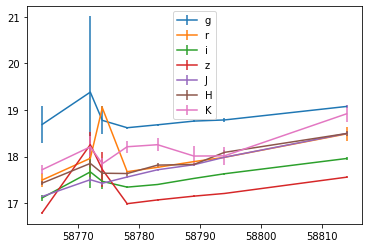

In [5]:
for band in 'grizJHK':
    idx = grond_lc['magerr_g'] < 2 #< 0.08
    mag_err = grond_lc['magerr_%s' % band]
    plt.errorbar(grond_lc['mjd'][idx], grond_lc['mag_%s' % band][idx], yerr=mag_err[idx], label=band)
plt.legend()

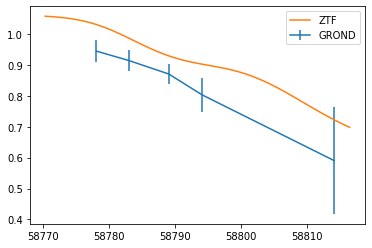

In [64]:
idx = grond_lc['magerr_g'] < 0.08
grond_err = grond_lc['magerr_g'] + grond_lc['magerr_r']
plt.errorbar(grond_lc['mjd'][idx], (grond_lc['mag_g']-grond_lc['mag_r'])[idx], yerr=grond_err[idx], label='GROND')
idx = np.logical_and(all_lc.index > 58770, all_lc.index < 58817)
plt.plot(all_lc.index[idx], (all_lc['mag_"g"_ZTF'] - all_lc['mag_"r"_ZTF'])[idx], label='ZTF')
plt.legend()

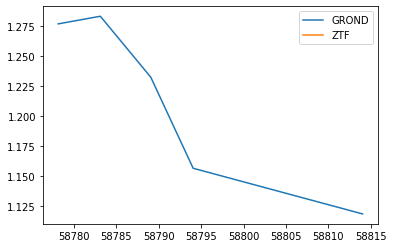

In [65]:
idx = grond_lc['magerr_g'] < 0.08
plt.plot(grond_lc['mjd'][idx], (grond_lc['mag_g']-grond_lc['mag_i'])[idx], label='GROND')
idx = np.logical_and(all_lc.index > 58770, all_lc.index < 58817)
plt.plot(all_lc.index[idx], (all_lc['mag_"g"_ZTF'] - all_lc['mag_"i"_ZTF'])[idx], label='ZTF')
plt.legend()

In [39]:
# try to find suitable cal star
phot_f = "/home/welterde/mess/2021/04/phot_v3/2019-10-07_r.h5"
phot = tbl.Table.read(phot_f, format='hdf5', path='/GROND/r/phot/psf')
phot

<Table length=65>
  ID  XCENTER  YCENTER  ...  PERROR          RA                DEC        
int64 float64  float64  ...  bytes8       float64            float64      
----- -------- -------- ... -------- ------------------ ------------------
   27  192.027 1936.973 ... No_error  346.8655507895496 13.872821280884324
    1 1565.984   58.823 ... No_error  346.8028950820356 13.790247880191512
   15   76.807  437.194 ... No_error 346.87053966771407 13.806700544276742
   65 1609.357  921.906 ... No_error  346.8010545453966 13.828294530778056
   62  494.959 1144.239 ... No_error 346.85167280491584  13.83792833059654
   52 1106.155 1226.133 ... No_error 346.82394158722246 13.841629883185727
   37  264.505 1078.356 ... No_error 346.86212315347956  13.83498901132172
   17  528.815    466.7 ... No_error 346.85002931026844 13.808070977664002
   20  656.631  503.326 ... No_error 346.84423389652375 13.809704741978763
   24    78.26   717.26 ... No_error 346.87051890250723  13.81904467537484
  ...      ...      ... ...      ...                ...                ...
   44  449.409  787.825 ... No_error 346.85368406302166 13.822212395289288
   45  1063.43 1404.678 ... No_error 346.82590831079847 13.849492923434317
    2  999.078   16.845 ... No_error   346.828616641219 13.788314592537866
   51 1056.073 1423.672 ... No_error 346.82624518533845 13.850328992009556
   31  413.389 1695.846 ... No_error  346.8554628937436 13.862227885509226
   48 1072.027 1395.158 ... No_error  346.8255165972664 13.849074605163489
   38   22.531   913.89 ... No_error 346.87308019051153 13.827702396162872
   50 1053.658 1410.902 ... No_error 346.82635286042404  13.84976579528454
    9 1821.357  171.281 ... No_error  346.7913218939296  13.79524103112685
   26  383.059  929.983 ... No_error  346.8567182127317 13.828467802092698

In [36]:
# only in mag range of SN
idx = np.abs(phot['MAG1']-18.5) < 0.5
phot[idx]

<Table length=10>
    IMAGE       XINIT    YINIT   ...         RA                DEC        
   bytes14     float64  float64  ...      float64            float64      
-------------- -------- -------- ... ------------------ ------------------
input_ana.fits 1566.172   58.675 ... 346.80288652801795  13.79024138420778
input_ana.fits  528.823  466.479 ...  346.8500289123805 13.808061238312657
input_ana.fits  656.671  503.139 ...  346.8442320518084 13.809696506026047
input_ana.fits 1942.182 1874.982 ...  346.7860859358239 13.870348811781577
input_ana.fits 1307.118 1615.721 ... 346.81487798217927 13.858830577305234
input_ana.fits  758.354 1574.595 ... 346.83978358268496 13.856936338683898
input_ana.fits  904.741  904.123 ... 346.83303474604946 13.827407288429002
input_ana.fits  939.024  852.895 ...  346.8314707398204 13.825154542814957
input_ana.fits  757.059  943.873 ... 346.83974427656904 13.829137061522927
input_ana.fits  509.108  935.014 ... 346.85099756333426 13.828708903912295

In [59]:
ref_cat = {}
for band in 'g':
    for fname in glob.glob("/home/welterde/mess/2021/04/phot_v3/*_%s.h5" % band):
        phot = tbl.Table.read(fname, format='hdf5', path='/GROND/%s/phot/psf' % band)
        if band not in ref_cat:
            ref_cat[band] = (fname, len(phot), phot)
        if ref_cat[band][1] < len(phot):
            ref_cat[band] = (fname, len(phot), phot)
print(ref_cat)

for (_fname, _len, ref_cat_phot) in ref_cat.values():
    idx = np.ones(len(ref_cat_phot), dtype=np.bool)
    ref_coords = coord.SkyCoord(ref_cat_phot['RA'], ref_cat_phot['DEC'], unit=(u.deg, u.deg))
    for band in 'grizJHK':
        for fname in glob.glob("/home/welterde/mess/2021/04/phot_v3/*_%s.h5" % band):
            phot = tbl.Table.read(fname, format='hdf5', path='/GROND/%s/phot/aperture' % band)
            phot_coords = coord.SkyCoord(phot['RA'], phot['DEC'], unit=(u.deg, u.deg))
            for i in  range(len(ref_coords)):
                if idx[i]:
                    if phot_coords.separation(ref_coords[i]).min() > 1.5*u.arcsec:
                        idx[i] = False
print('Found: ', np.count_nonzero(idx))
ref_cat['g'][2][idx]

{'g': ('/home/welterde/mess/2021/04/phot_v3/2019-11-26_g.h5', 74, <Table length=74>
  ID  XCENTER  YCENTER  ...  PERROR          RA                DEC        
int64 float64  float64  ...  bytes8       float64            float64      
----- -------- -------- ... -------- ------------------ ------------------
    3  139.652   20.429 ... No_error 346.86702881310663 13.789693354767167
    7  1811.41  142.431 ... No_error 346.79130339321307 13.795416850846323
    9   48.903  185.238 ... No_error 346.87117816089875 13.796926055026697
   20  974.089  467.375 ... No_error  346.8293162240073 13.809541681068943
   19  644.884  473.826 ... No_error  346.8442359452889 13.809755268286612
   51  437.634  758.922 ... No_error 346.85369132056235 13.822256550133176
   45 1599.997  890.274 ... No_error 346.80104261364346 13.828283058880341
   24  497.445  905.587 ... No_error  346.8510134179262 13.828723666965576
   72 1563.231 1029.117 ... No_error  346.8027384802962 13.834385406593869
   70  483.401 1

<Table length=5>
  ID  XCENTER  YCENTER  ...  PERROR          RA                DEC        
int64 float64  float64  ...  bytes8       float64            float64      
----- -------- -------- ... -------- ------------------ ------------------
   68 1558.193 1148.049 ... No_error  346.8029922023666 13.839618116373517
   40  979.849 1215.486 ... No_error 346.82921863794195 13.842464465596054
   65 1317.921 1315.399 ... No_error   346.813917890181 13.846932509289834
   44  252.282 1048.921 ... No_error 346.86215637355275  13.83497801268843
   53  974.744 1522.856 ... No_error  346.8295171855163   13.8559895850371

g -> 0.027395
r -> 0.063394
i -> 0.015602
z -> 0.026323
J -> 0.016489
H -> 0.041788
K -> 0.153080


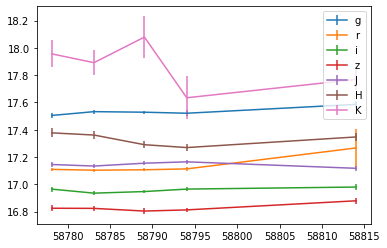

In [60]:
cal_lc = tbl.Table.read("2021-03-08-grond-cal-extract.fits")

for band in 'grizJHK':
    idx = cal_lc['magerr_g'] < 0.1
    mag = cal_lc['mag_%s' % band]
    print('%s -> %f' % (band, np.std(mag[idx])))
    mag_err = cal_lc['magerr_%s' % band]
    plt.errorbar(cal_lc['mjd'][idx], cal_lc['mag_%s' % band][idx], yerr=mag_err[idx], label=band)
plt.legend()

In [51]:
cal_lc

<Table length=8>
       mjd              mag_g        ...     magerr_cal_K     ncal_K
     float64           float64       ...       float64        int64 
----------------- ------------------ ... -------------------- ------
 58764.1901355999 18.993626500001547 ...  0.01462646198094707     25
58772.07589106129  19.46916633333489 ...  0.02019395463577224     18
58774.04200655782   18.8384895555568 ...  0.01858621704903304     30
58778.11519076466   18.5974155045909 ... 0.016991464980513227     31
58783.09287482079  18.59929667120298 ...  0.01695297900660148     32
58789.05341837661  18.95822853103948 ... 0.015186171174381905     25
58794.05187395877  18.57660613698111 ... 0.014230719101053078     27
58814.05056632643  18.65959314445816 ... 0.014796060108710637     30

g -> 0.157171
r -> 0.283025
i -> 0.217501
z -> 0.196122
J -> 0.321023
H -> 0.298526
K -> 0.333411


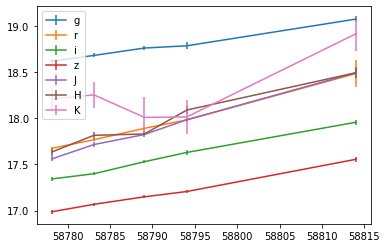

In [61]:
tgt_lc = tbl.Table.read("2021-03-08-grond-tgt-extract.fits")

for band in 'grizJHK':
    idx = tgt_lc['magerr_g'] < 0.1
    mag = tgt_lc['mag_%s' % band]
    print('%s -> %f' % (band, np.std(mag[idx])))
    mag_err = tgt_lc['magerr_%s' % band]
    plt.errorbar(tgt_lc['mjd'][idx], tgt_lc['mag_%s' % band][idx], yerr=mag_err[idx], label=band)
plt.legend()

In [71]:
GROND_INS = [
#    ('g', 4586.85, 5.36482e-9),
#    ('r', 6220.09, 2.92735e-9),
#    ('i', 7640.69, 1.88225e-9),
#    ('z', 8989.58, 1.36524e-9),
    ('J', 12399.17, 7.25809e-10),
    ('H', 16468.80, 4.08192e-10),
    ('K', 21705.48, 2.34388e-10)
]
GROND_BANDS = [x[0] for x in GROND_INS]
GROND_CENT_WAVELENGTHS = [x[1] for x in GROND_INS]
GROND_ZERO_FLUXES = [x[2] for x in GROND_INS]

EXTINCTION_COEFF = {
    'g': 3.303,
    'r': 2.285,
    'i': 1.698,
    'z': 1.263,
    'J': 0.723,
    'H': 0.460,
    'K': 0.310
}
ebv = 0.165

mags = [tgt_lc[0]['mag_%s' % band] - EXTINCTION_COEFF[band]*ebv for x in GROND_BANDS]
fluxes = GROND_ZERO_FLUXES*10**(-0.4*np.array(mags))
ir_flux = np.trapz(fluxes, GROND_CENT_WAVELENGTHS)

GROND_INS = [
    ('g', 4586.85, 5.36482e-9),
    ('r', 6220.09, 2.92735e-9),
    ('i', 7640.69, 1.88225e-9),
    ('z', 8989.58, 1.36524e-9),
    ('J', 12399.17, 7.25809e-10),
    ('H', 16468.80, 4.08192e-10),
    ('K', 21705.48, 2.34388e-10)
]
GROND_BANDS = [x[0] for x in GROND_INS]
GROND_CENT_WAVELENGTHS = [x[1] for x in GROND_INS]
GROND_ZERO_FLUXES = [x[2] for x in GROND_INS]

mags = [tgt_lc[0]['mag_%s' % band] - EXTINCTION_COEFF[band]*ebv for x in GROND_BANDS]
fluxes = GROND_ZERO_FLUXES*10**(-0.4*np.array(mags))
all_flux = np.trapz(fluxes, GROND_CENT_WAVELENGTHS)

print('IR Flux: %e' % ir_flux)
print('AllFlux: %e' % all_flux)
print('Fraction:%f' % (ir_flux/all_flux))

IR Flux: 8.360697e-13
AllFlux: 1.710127e-12
Fraction:0.488893
